In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('pokemon.csv')

In [3]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
df.shape

(801, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [6]:
df.is_legendary.value_counts()

is_legendary
0    731
1     70
Name: count, dtype: int64

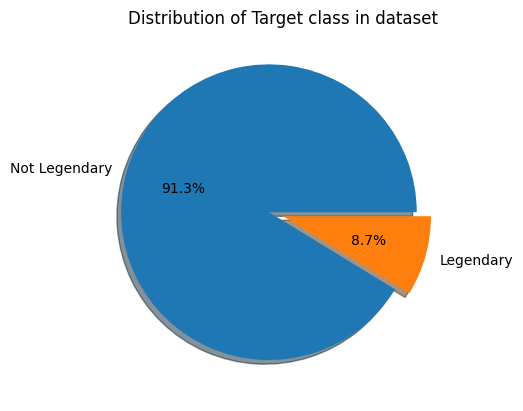

In [7]:
%matplotlib inline
plt.pie(x=df.is_legendary.value_counts(), autopct='%1.1f%%',
       labels=['Not Legendary', 'Legendary'], startangle=0, explode=[0.1, 0], shadow=True)
plt.title('Distribution of Target class in dataset')
plt.show()

In [8]:
#checking missing values
for col in df.columns:
    missing_percentage = df[col].isnull().sum() / len(df) * 100
    print(f"{col}:   {missing_percentage:.2f}%")

abilities:   0.00%
against_bug:   0.00%
against_dark:   0.00%
against_dragon:   0.00%
against_electric:   0.00%
against_fairy:   0.00%
against_fight:   0.00%
against_fire:   0.00%
against_flying:   0.00%
against_ghost:   0.00%
against_grass:   0.00%
against_ground:   0.00%
against_ice:   0.00%
against_normal:   0.00%
against_poison:   0.00%
against_psychic:   0.00%
against_rock:   0.00%
against_steel:   0.00%
against_water:   0.00%
attack:   0.00%
base_egg_steps:   0.00%
base_happiness:   0.00%
base_total:   0.00%
capture_rate:   0.00%
classfication:   0.00%
defense:   0.00%
experience_growth:   0.00%
height_m:   2.50%
hp:   0.00%
japanese_name:   0.00%
name:   0.00%
percentage_male:   12.23%
pokedex_number:   0.00%
sp_attack:   0.00%
sp_defense:   0.00%
speed:   0.00%
type1:   0.00%
type2:   47.94%
weight_kg:   2.50%
generation:   0.00%
is_legendary:   0.00%


In [9]:
df.type2.value_counts()

type2
flying      95
poison      34
ground      34
fairy       29
psychic     29
fighting    25
steel       22
dark        21
grass       20
water       17
dragon      17
ice         15
rock        14
ghost       14
fire        13
electric     9
bug          5
normal       4
Name: count, dtype: int64

- looks like most of the class are flying class but instead of just fitting the data with mode we will check the frequency distribution of the type2 attribute and impute new values accordingly.

In [10]:
value_counts = df['type2'].value_counts()
probabilities = value_counts/value_counts.sum()

In [11]:
def impute_with_probabilities(series, probabilities):
    missing_indices = series[series.isnull()].index
    imputed_values = np.random.choice(probabilities.index,
                                      size=len(missing_indices), 
                                      p=probabilities.values)
    series.loc[missing_indices] = imputed_values
    return series

In [12]:
df2 = df.copy()

In [13]:
df2['type2'] = impute_with_probabilities(df2.type2, probabilities)  # imputing according to the frquency distribution of the data

- we still have some missing values in 'weight_kg','height_m','percentage_male' these columns but these are numerical features so we will impute these values using median.

In [15]:
# Creating a test set for testing
from sklearn.model_selection import StratifiedShuffleSplit
